# How to use an API + Api Test NoteBook

In [344]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6a0c92d1-d496-407c-8aff-bc70a091c48c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-22T10:12:20.077Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11781, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [346]:
type(data)

dict

In [103]:
import pandas as pd
# This allows you to see all the columns, not just like 25
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 20)

In [348]:
# This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11781,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19771328.00000,19771328.00000,False,NaN,1,NaN,NaN,None,2024-10-22T10:10:00.000Z,66882.80493,37740312473.79302,45.46330,-0.07651,-2.25842,2.00469,6.54432,9.43506,0.58582,1322361873755.63281,57.16450,1404538903449.89990,None,2024-10-22T10:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-22 13:12:37.769961
1,1027,Ethereum,ETH,ethereum,9437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120392960.02775,120392960.02775,True,NaN,2,NaN,NaN,None,2024-10-22T10:10:00.000Z,2620.85434,16631876221.92788,-11.10680,-0.28114,-3.44186,0.55542,1.50218,-1.86414,-24.35880,315532411469.75775,13.64020,315532411469.76001,None,2024-10-22T10:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-22 13:12:37.769961
2,825,Tether USDt,USDT,tether,100865,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120219543500.33812,121337937370.43233,True,NaN,3,NaN,NaN,None,2024-10-22T10:10:00.000Z,0.99930,65355035957.20931,13.23970,-0.00103,-0.02314,-0.01908,-0.17270,-0.07842,-0.07367,120135757348.41956,5.19340,121253371761.89999,None,2024-10-22T10:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-22 13:12:37.769961
3,1839,BNB,BNB,bnb,2266,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931414.90876,145931414.90876,False,NaN,4,NaN,NaN,None,2024-10-22T10:10:00.000Z,589.82694,1791856893.29241,-1.31320,0.39593,-2.83419,0.63176,1.16831,1.85875,0.23349,86074279757.77504,3.72090,86074279757.78000,None,2024-10-22T10:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-22 13:12:37.769961
4,5426,Solana,SOL,solana,768,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470010881.17438,586987870.70306,True,NaN,5,NaN,NaN,None,2024-10-22T10:10:00.000Z,164.51551,3424452168.31791,-3.52180,-0.46924,-1.47107,6.67325,13.15860,13.77714,-6.96955,77324080542.32661,3.34270,96568609812.19000,None,2024-10-22T10:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-22 13:12:37.769961
5,3408,USDC,USDC,usd-coin,22585,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34630933301.05357,34630933301.05357,False,NaN,6,NaN,NaN,None,2024-10-22T10:10:00.000Z,0.99978,7072151385.09292,39.71210,-0.00532,-0.01586,-0.01252,-0.09203,-0.02844,-0.01444,34623418868.98213,1.49670,34623418868.98000,None,2024-10-22T10:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-22 13:12:37.769961
6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56706436160.00000,99987115141.00000,False,NaN,7,NaN,NaN,None,2024-10-22T10:10:00.000Z,0.53349,1193036926.68004,9.58810,-0.30278,-3.99200,-1.90596,-10.17799,-11.03856,-13.98824,30252045211.91980,1.30780,53348521368.13000,None,2024-10-22T10:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-22 13:12:37.769961
7,74,Dogecoin,DOGE,dogecoin,1084,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146471286383.70514,146471286383.70514,True,NaN,8,NaN,NaN,None,2024-10-22T10:10:00.000Z,0.14193,1789908426.56487,-7.26460,-0.70118,-2.81252,22.76730,32.29802,32.73556,6.07362,20789365044.57257,0.89870,20789365044.57000,None,2024-10-22T10:10:00.000Z,N

In [352]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original sandbox Environment:'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6a0c92d1-d496-407c-8aff-bc70a091c48c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# Note
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda promt to change this to allow to pull data

    df = None
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index = True)

    if not os.path.isfile('/Users/briankimanzi/Documents/programming Languages/PythonProgramming/Jupyter_NoteBook/Api/api.csv'):
        df.to_csv('/Users/briankimanzi/Documents/programming Languages/PythonProgramming/Jupyter_NoteBook/Api/api.csv', header = 'column_names')
    else:
        df.to_csv('/Users/briankimanzi/Documents/programming Languages/PythonProgramming/Jupyter_NoteBook/Api/api.csv', mode='a' ,header =False)

# if that didn't work try using the local host URL 




In [ ]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Succefully')
    sleep(60)  # sleep for 1 minute
exit()

In [358]:
df = pd.read_csv('/Users/briankimanzi/Documents/programming Languages/PythonProgramming/Jupyter_NoteBook/Api/api.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19769709.00000,19769709.00000,False,NaN,1,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,68326.12115,30188238629.89158,-15.26070,-0.06879,0.54641,8.92466,9.96010,12.11156,2.37198,1350787532186.64868,57.59880,1434848544099.43994,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
1,1,1027,Ethereum,ETH,ethereum,9431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120388140.92289,120388140.92289,True,NaN,2,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,2639.78020,14593067851.83928,-8.17740,-0.23829,0.22944,7.91272,8.31629,-1.40975,-24.32784,317798230647.47980,13.55230,317798230647.47998,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
2,2,825,Tether USDt,USDT,tether,100726,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,120103979667.94356,121362937380.47128,True,NaN,3,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.99993,51624385779.09729,-11.57320,0.00638,0.01783,0.02524,-0.01101,-0.09155,-0.03917,120095680319.93613,5.12070,121354551036.78000,NaN,2024-10-19T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-19 10:47:03.059958
3,3,1839,BNB,BNB,bnb,2263,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145931590.79925,145931590.79925,False,NaN,4,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,597.61606,1586141431.86059,-6.30490,-0.06793,0.06778,3.47703,7.22336,5.10729,0.87376,87211061982.44347,3.71860,87211061982.44000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
4,4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469938943.29549,586859052.77363,True,NaN,5,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,154.44601,1544884602.24793,-26.12730,-0.35757,0.39785,6.10618,11.38959,4.91266,-10.04578,72580192918.68394,3.09470,90638036864.30000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
5,5,3408,USDC,USDC,usd-coin,22555,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35000819588.39301,35000819588.39301,False,NaN,6,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.99995,5159788619.71486,-7.88860,0.00130,-0.00594,-0.00040,0.00017,-0.04438,0.00151,34999079499.89224,1.49230,34999079499.89000,NaN,2024-10-19T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-19 10:47:03.059958
6,6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56706436160.00000,99987115141.00000,False,NaN,7,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.54704,885729215.51576,-26.15390,-0.00782,-0.65075,1.67035,-6.37997,-10.23613,-7.42928,31020850277.09649,1.32270,54704284694.54000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
7,7,74,Dogecoin,DOGE,dogecoin,1083,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146428716383.70520,146428716383.70520,True,NaN,8,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.14453,2141810301.71869,5.83720,-0.52781,7.50785,30.06889,38.87948,36.92903,10.20357,21163087951.79908,0.90240,21163087951.80000,NaN,2024-10-19T07:44:00.000Z

In [310]:
# df = pd.set_option('display.max_rows', None)
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19769709.00000,19769709.00000,False,NaN,1,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,68326.12115,30188238629.89158,-15.26070,-0.06879,0.54641,8.92466,9.96010,12.11156,2.37198,1350787532186.64868,57.59880,1434848544099.43994,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
1,1,1027,Ethereum,ETH,ethereum,9431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120388140.92289,120388140.92289,True,NaN,2,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,2639.78020,14593067851.83928,-8.17740,-0.23829,0.22944,7.91272,8.31629,-1.40975,-24.32784,317798230647.47980,13.55230,317798230647.47998,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
2,2,825,Tether USDt,USDT,tether,100726,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,120103979667.94356,121362937380.47128,True,NaN,3,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.99993,51624385779.09729,-11.57320,0.00638,0.01783,0.02524,-0.01101,-0.09155,-0.03917,120095680319.93613,5.12070,121354551036.78000,NaN,2024-10-19T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-19 10:47:03.059958
3,3,1839,BNB,BNB,bnb,2263,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145931590.79925,145931590.79925,False,NaN,4,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,597.61606,1586141431.86059,-6.30490,-0.06793,0.06778,3.47703,7.22336,5.10729,0.87376,87211061982.44347,3.71860,87211061982.44000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
4,4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469938943.29549,586859052.77363,True,NaN,5,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,154.44601,1544884602.24793,-26.12730,-0.35757,0.39785,6.10618,11.38959,4.91266,-10.04578,72580192918.68394,3.09470,90638036864.30000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
5,5,3408,USDC,USDC,usd-coin,22555,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35000819588.39301,35000819588.39301,False,NaN,6,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.99995,5159788619.71486,-7.88860,0.00130,-0.00594,-0.00040,0.00017,-0.04438,0.00151,34999079499.89224,1.49230,34999079499.89000,NaN,2024-10-19T07:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-19 10:47:03.059958
6,6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56706436160.00000,99987115141.00000,False,NaN,7,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.54704,885729215.51576,-26.15390,-0.00782,-0.65075,1.67035,-6.37997,-10.23613,-7.42928,31020850277.09649,1.32270,54704284694.54000,NaN,2024-10-19T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:47:03.059958
7,7,74,Dogecoin,DOGE,dogecoin,1083,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146428716383.70520,146428716383.70520,True,NaN,8,NaN,NaN,NaN,2024-10-19T07:44:00.000Z,0.14453,2141810301.71869,5.83720,-0.52781,7.50785,30.06889,38.87948,36.92903,10.20357,21163087951.79908,0.90240,21163087951.80000,NaN,2024-10-19T07:44:00.000Z

In [296]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [364]:
# dropping unused columns
df = df.drop('Unnamed')
df

KeyError: "['Unnamed'] not found in axis"

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                      'quote.USD.percent_change_24h',
                                      'quote.USD.percent_change_7d',
                                      'quote.USD.percent_change_30d',
                                      'quote.USD.percent_change_60d',
                                      'quote.USD.percent_change_90d']].mean()
df3

In [320]:
df4 = df3.stack(level=0, dropna=False)
# df4_reset = df4.unstack()print(df4_reset)
df4

0    Unnamed: 0                                                                            0
     id                                                                                    1
     name                                                                            Bitcoin
     symbol                                                                              BTC
     slug                                                                            bitcoin
     num_market_pairs                                                                  11779
     date_added                                                     2010-07-13T00:00:00.000Z
     tags                                  ['mineable', 'pow', 'sha-256', 'store-of-value...
     max_supply                                                               21000000.00000
     circulating_supply                                                       19769709.00000
     total_supply                                                     

In [322]:
type(df3)
#type(df4)

pandas.core.frame.DataFrame

In [324]:
df5 = df4.to_frame(name='Values')
pd.set_option('display.max_rows', None)
df5

Values
0   Unnamed: 0                                                                          0
    id                                                                                  1
    name                                                                          Bitcoin
    symbol                                                                            BTC
    slug                                                                          bitcoin
    num_market_pairs                                                                11779
    date_added                                                   2010-07-13T00:00:00.000Z
    tags                                ['mineable', 'pow', 'sha-256', 'store-of-value...
    max_supply                                                             21000000.00000
    circulating_supply                                                     19769709.00000
    total_supply                                                           19769709.00000
    infinite_supply                                                                 False
    platform                                                                          NaN
    cmc_rank                                                                            1
    self_reported_circulating_supply                                                  NaN
    self_reported_market_cap                                                          NaN
    tvl_ratio                                                                         NaN
    last_updated                                                 2024-10-19T07:44:00.000Z
    quote.USD.price                                                           68326.12115
    quote.USD.volume_24h                                                30188238629.89158
    quote.USD.volume_change_24h                                                 -15.26070
    quote.USD.percent_change_1h                                                  -0.06879
    quote.USD.percent_change_24h                                                  0.54641
    quote.USD.percent_change_7d                                                   8.92466
    quote.USD.percent_change_30d                                                  9.96010
    quote.USD.percent_change_60d                                                 12.11156
    quote.USD.percent_change_90d                                                  2.37198
    quote.USD.market_cap                                              1350787532186.64868
    quote.USD.market_cap_dominance                                               57.59880
    quote.USD.fully_diluted_market_cap                                1434848544099.43994
    quote.USD.tvl                                                                     NaN
    quote.USD.last_updated                                       2024-10-19T07:44:00.000Z
    platform.id                                                                       NaN
    platform.name                                                                     NaN
    platform.symbol                                                                   NaN
    platform.slug                                                                     NaN
    platform.token_address                                                            NaN
    timestamp                                                  2024-10-19 10:47:03.059958
1   Unnamed: 0                                                                          1
    id                                                                               1027
    name                                                                         Ethereum
    symbol                                                                            ETH
    slug                                                                         ethereum
    num_market_pairs                                                                 9431
    date_added                   

In [326]:
df5.count()

Values    5208
dtype: int64

In [182]:
index = pd.Index(range(120))
df6 = df5.reset_index() # reset the index
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.07496
1,Bitcoin,quote.USD.percent_change_24h,0.55000
2,Bitcoin,quote.USD.percent_change_7d,8.89352
3,Bitcoin,quote.USD.percent_change_30d,9.90662
4,Bitcoin,quote.USD.percent_change_60d,12.19975
5,Bitcoin,quote.USD.percent_change_90d,2.34828
6,Ethereum,quote.USD.percent_change_1h,-0.20641
7,Ethereum,quote.USD.percent_change_24h,0.23782
8,Ethereum,quote.USD.percent_change_7d,7.90258
9,Ethereum,quote.USD.percent_change_30d,8.25205


In [192]:
df7 = df6.rename(columns={'level_1': 'Percent change'})
df7

,name,Percent change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.07496
1,Bitcoin,quote.USD.percent_change_24h,0.55000
2,Bitcoin,quote.USD.percent_change_7d,8.89352
3,Bitcoin,quote.USD.percent_change_30d,9.90662
4,Bitcoin,quote.USD.percent_change_60d,12.19975
5,Bitcoin,quote.USD.percent_change_90d,2.34828
6,Ethereum,quote.USD.percent_change_1h,-0.20641
7,Ethereum,quote.USD.percent_change_24h,0.23782
8,Ethereum,quote.USD.percent_change_7d,7.90258
9,Ethereum,quote.USD.percent_change_30d,8.25205


In [210]:
# changing values of the columns
df7['Percent change'] = df7['Percent change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h', '7days', '30days', '60days', '90days'])
df7

,name,Percent change,Values
0,Bitcoin,1h,-0.07496
1,Bitcoin,24h,0.55000
2,Bitcoin,7days,8.89352
3,Bitcoin,30days,9.90662
4,Bitcoin,60days,12.19975
5,Bitcoin,90days,2.34828
6,Ethereum,1h,-0.20641
7,Ethereum,24h,0.23782
8,Ethereum,7days,7.90258
9,Ethereum,30days,8.25205


In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

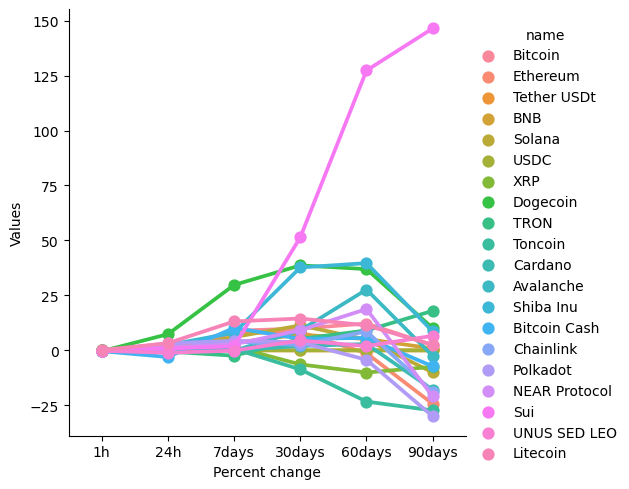

In [212]:
sns.catplot(x='Percent change', y='Values', hue='name', data=df7, kind='point')


In [261]:
df7 = df[['name','quote.USD.price','timestamp']]
# df7 = df7.query("name == 'Ethereum'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,68307.74540,2024-10-19 10:49:04.615672
1,Ethereum,2639.53968,2024-10-19 10:49:04.615672
2,Tether USDt,0.99992,2024-10-19 10:49:04.615672
3,BNB,597.35938,2024-10-19 10:49:04.615672
4,Solana,154.36465,2024-10-19 10:49:04.615672
5,USDC,0.99994,2024-10-19 10:49:04.615672
6,XRP,0.54678,2024-10-19 10:49:04.615672
7,Dogecoin,0.14431,2024-10-19 10:49:04.615672
8,TRON,0.15813,2024-10-19 10:49:04.615672
9,Toncoin,5.26677,2024-10-19 10:49:04.615672


In [ ]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y = 'quote.USD.price', data= df10)

In [328]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          180 non-null    int64  
 1   id                                  180 non-null    int64  
 2   name                                180 non-null    object 
 3   symbol                              180 non-null    object 
 4   slug                                180 non-null    object 
 5   num_market_pairs                    180 non-null    int64  
 6   date_added                          180 non-null    object 
 7   tags                                180 non-null    object 
 8   max_supply                          57 non-null     float64
 9   circulating_supply                  180 non-null    float64
 10  total_supply                        180 non-null    float64
 11  infinite_supply                     180 non-n

In [ ]:
# this code drops the unused column
df1['Unnamed'] = df.drop(columns=['Unnamed'], errors = 'ignore')
df1